In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing

%matplotlib inline

In [17]:
#Read clean data of used car
cars_2021 = pd.read_csv('/content/drive/MyDrive/EMSE 6574 Project/cleaned_data_2021.csv')
cars_2021.head()

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,27,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
1,28,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al
2,29,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
3,30,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al
4,31,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al


In [18]:
cars_2021 = cars_2021.drop(columns='Unnamed: 0')

In [5]:
le = preprocessing.LabelEncoder()
cars_2021_encoded = cars_2021[['manufacturer','model','cylinders','fuel','title_status','transmission','drive','size','type','paint_color','state']] = cars_2021[['manufacturer','model','cylinders','fuel','title_status','transmission','drive','size','type','paint_color','state']].apply(le.fit_transform)
cars_2021_encoded

,manufacturer,model,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,13,19771,6,2,0,2,3,4,8,10,1
1,7,20126,6,2,0,2,3,4,8,1,1
2,7,20170,6,2,0,2,3,4,8,8,1
3,38,22819,6,2,0,2,3,4,8,8,1
4,12,11365,5,2,0,0,2,1,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
259957,30,15895,5,2,0,2,1,4,9,12,50
259958,40,19151,8,2,0,2,1,4,9,8,50
259959,6,24071,8,0,0,2,3,4,4,10,50
259960,22,10454,5,2,0,2,1,4,9,9,50


In [6]:
#Inorder to find the relationship between different variables, we should encoded the label into float first.
le = preprocessing.LabelEncoder()
cars_2021_encoded = pd.DataFrame.copy(cars_2021)
cars_2021_encoded[['manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color','state']] = cars_2021_encoded[['manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color','state']].apply(le.fit_transform)
cars_2021_encoded

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,33590,2014,13,19771,2,6,2,57923.0,0,2,3,4,8,10,1
1,22590,2010,7,20126,2,6,2,71229.0,0,2,3,4,8,1,1
2,39590,2020,7,20170,2,6,2,19160.0,0,2,3,4,8,8,1
3,30990,2017,38,22819,2,6,2,41124.0,0,2,3,4,8,8,1
4,15000,2013,12,11365,0,5,2,128000.0,0,0,2,1,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259957,23590,2019,30,15895,2,5,2,32226.0,0,2,1,4,9,12,50
259958,30590,2020,40,19151,2,8,2,12029.0,0,2,1,4,9,8,50
259959,34990,2020,6,24071,2,8,0,4174.0,0,2,3,4,4,10,50
259960,28990,2018,22,10454,2,5,2,30112.0,0,2,1,4,9,9,50


In [7]:
cars_2021

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,33590,2014,13,19771,good,6,2,57923.0,0,2,3,4,8,10,1
1,22590,2010,7,20126,good,6,2,71229.0,0,2,3,4,8,1,1
2,39590,2020,7,20170,good,6,2,19160.0,0,2,3,4,8,8,1
3,30990,2017,38,22819,good,6,2,41124.0,0,2,3,4,8,8,1
4,15000,2013,12,11365,excellent,5,2,128000.0,0,0,2,1,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259957,23590,2019,30,15895,good,5,2,32226.0,0,2,1,4,9,12,50
259958,30590,2020,40,19151,good,8,2,12029.0,0,2,1,4,9,8,50
259959,34990,2020,6,24071,good,8,0,4174.0,0,2,3,4,4,10,50
259960,28990,2018,22,10454,good,5,2,30112.0,0,2,1,4,9,9,50


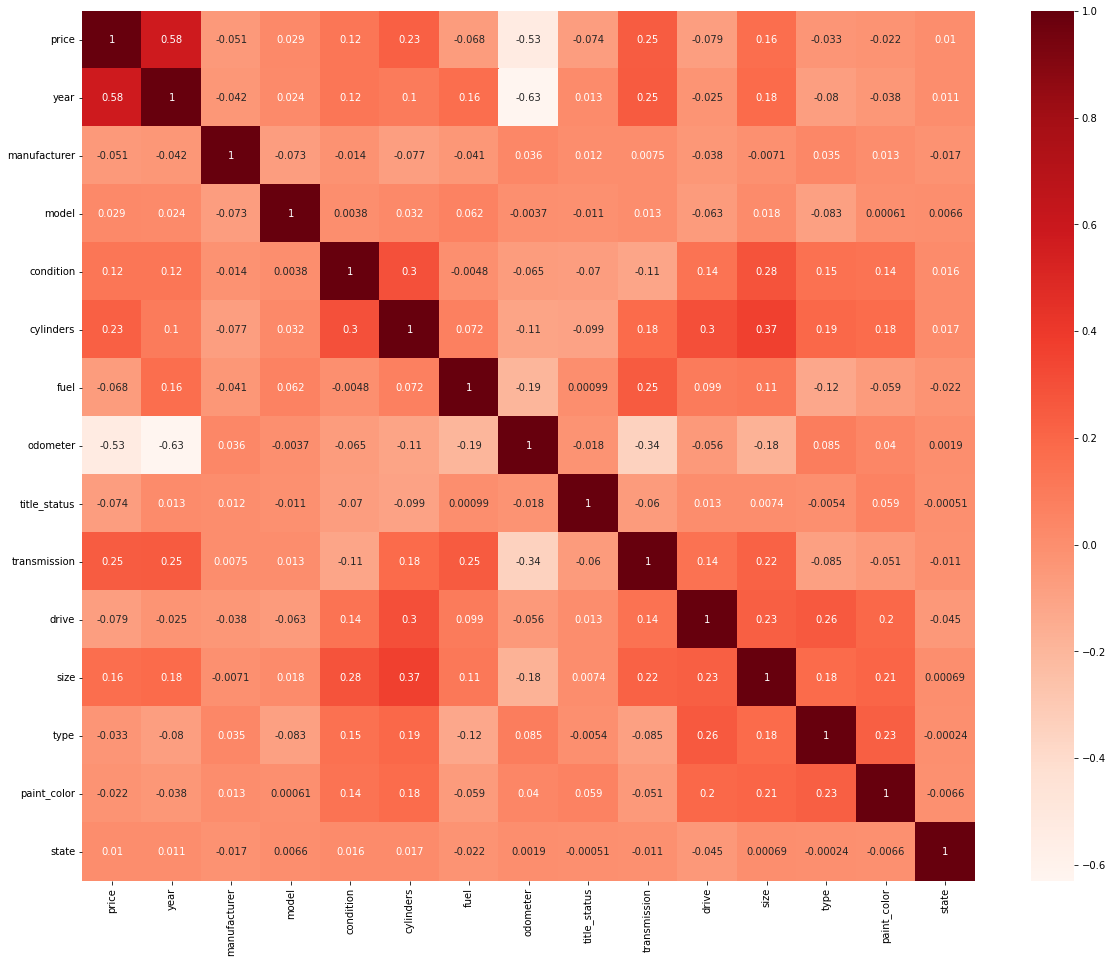

In [8]:
#Then we draw a correlation heatmap
plt.figure(figsize=(20,16))
cor = cars_2021_encoded.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#From the heatmap, we can see that price have a strong relation to year and negative relation to odometer, which is reasonable. The transmission is also an important label related to price.

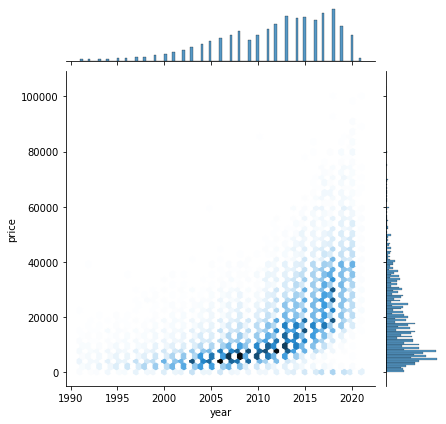

In [9]:
#The dark area is the concentrated area of the data, the price rise as the year of the car increase.
sns.jointplot(x='year', y='price', data=cars_2021_encoded, kind='hex')
plt.show()

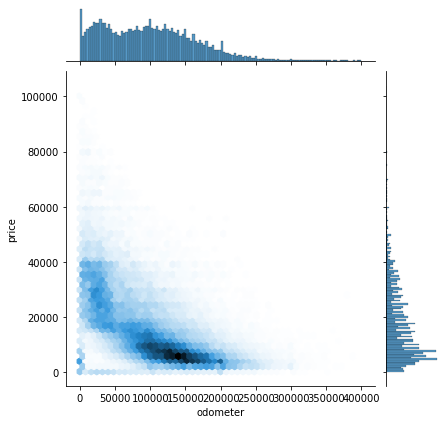

In [10]:
#The relationship between odometer and price are opposite to the graph above.
sns.jointplot(x='odometer', y='price', data=cars_2021_encoded, kind='hex')
plt.show()

In [11]:
#Effect of condition on paint_color
x = cars_2021.condition
y = cars_2021.paint_color
fig = go.Figure(go.Histogram2d(x=x,y=y))
fig.update_layout(autosize=False,width=700,height=500,margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="Silver",
)

fig.show()

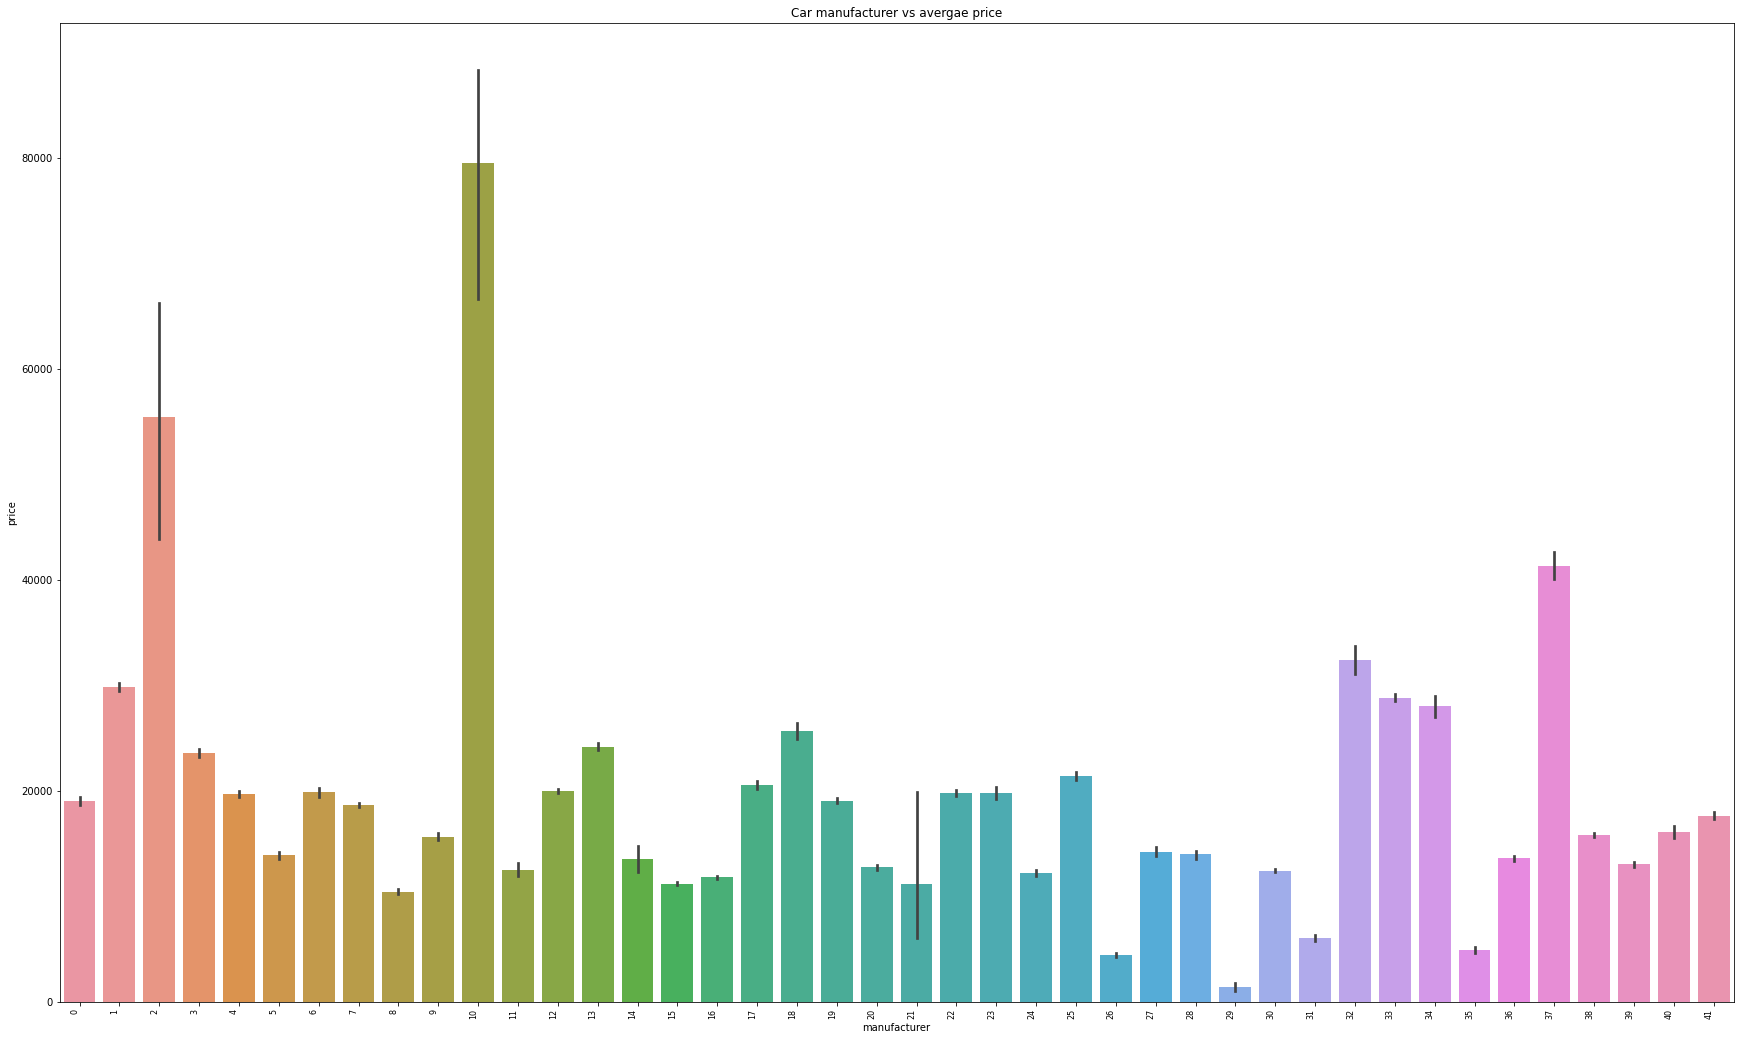

In [12]:
plt.figure(figsize=(30,18))
ax = sns.barplot(x='manufacturer', y='price', data=cars_2021);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.xlabel('manufacturer')
plt.ylabel('price')
plt.title("Car manufacturer vs avergae price");

Text(0.5, 0.98, 'Price of Different Transmissions with Various Fuel Types')

<Figure size 2160x1296 with 0 Axes>

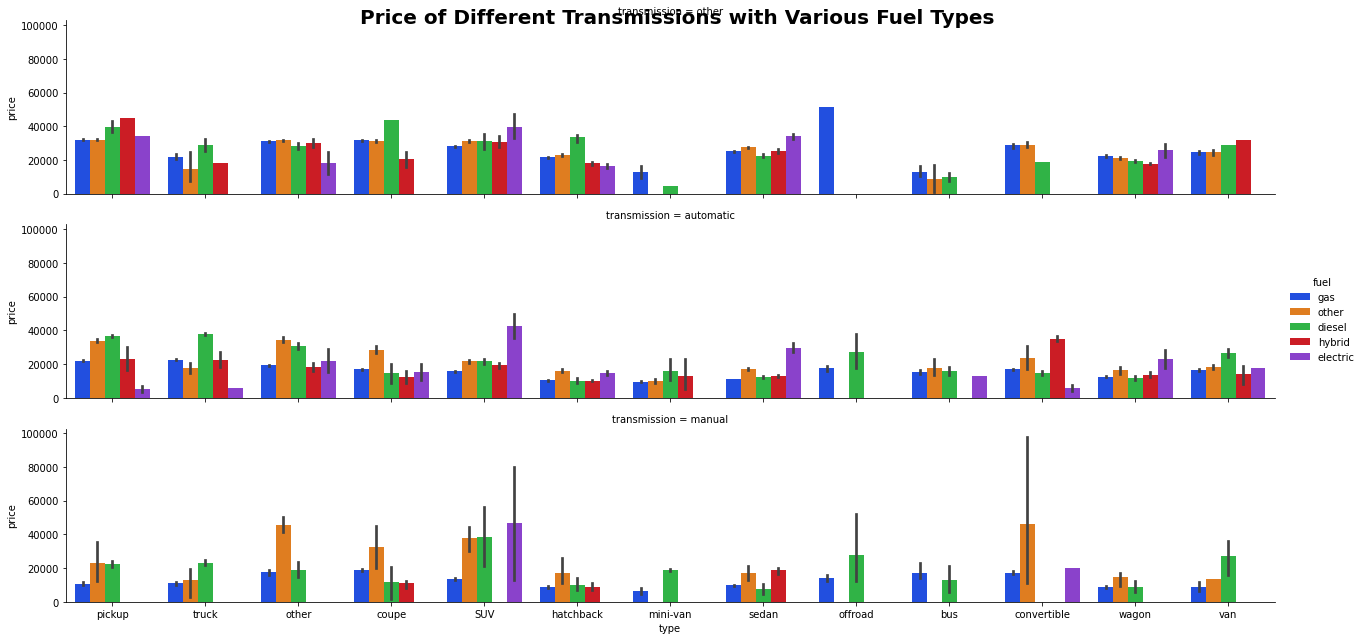

In [28]:
#Try to find difference in different car types with various transmission(Other and Unknown have good performance...)
rel = sns.catplot(x='type', y ='price', hue='fuel', col='transmission', data=cars_2021, kind="bar", aspect=6, height=3,  palette="bright", col_wrap=1)
rel.fig.suptitle('Price of Different Transmissions with Various Fuel Types',ha='center',size=20,weight='bold')

In [14]:
cars_2021_agg = cars_2021.groupby('manufacturer', as_index=False).agg({'price': 'sum'})
boba_graph = cars_2021_agg.sort_values(by=['price'])
boba_graph

,manufacturer,price
29,29,2800
21,21,111133
2,2,832249
14,14,1375760
10,10,2067767
26,26,3235023
35,35,3886974
11,11,6422933
31,31,8300234
1,1,14795749


In [ ]:
boba_graph.to_csv('./drive/MyDrive/boba_graph.csv')